# Dunn’s index at each iteration.

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>



 Initial draw points


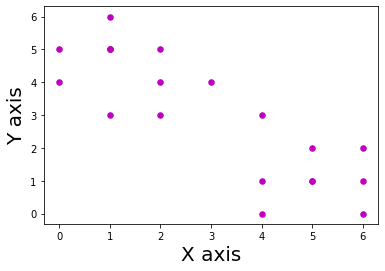



 K-Means iteration number 1


 The centriods are

 The frist centriods is [3.92857143 2.14285714] and the second is [0.66666667 5.        ]




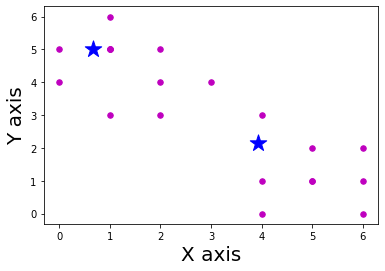



Calculate Dunn's Index
-----------------------


The value of Dunns Index is  0.5552032264436447
-----------------------




 K-Means iteration number 2


 The centriods are

 The frist centriods is [4.54545455 1.63636364] and the second is [1.         4.66666667]




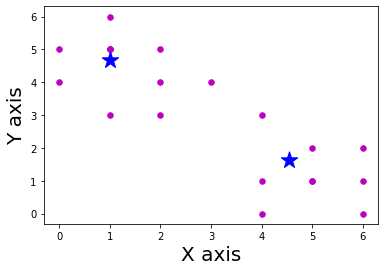



Calculate Dunn's Index
-----------------------


The value of Dunns Index is  0.5971652212451105
-----------------------




 K-Means iteration number 3


 The centriods are

 The frist centriods is [5.         1.22222222] and the second is [1.27272727 4.45454545]




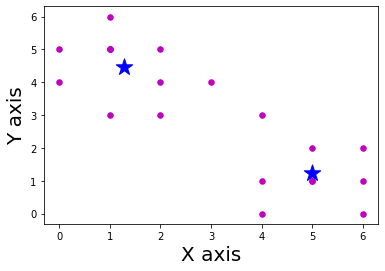



Calculate Dunn's Index
-----------------------


The value of Dunns Index is  0.6316836137628693
-----------------------




 K-Means iteration number 4


 The centriods are

 The frist centriods is [5.         1.22222222] and the second is [1.27272727 4.45454545]




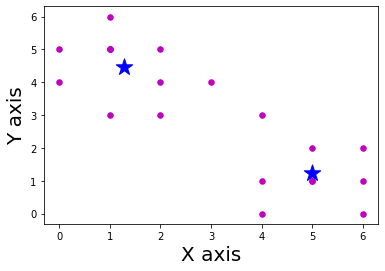



Calculate Dunn's Index
-----------------------


The value of Dunns Index is  0.6316836137628693
-----------------------




In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_data_before(data):
    x, y = data.iloc[:, 0] , data.iloc[:, 1]
    plt.scatter(x, y, color = "m",marker = "o", s = 30)

    plt.xlabel('X axis', size = 20)
    plt.ylabel('Y axis', size = 20)

    plt.show()

    
def closestCentriods(data, ini_cent):
    
    K = np.shape(ini_cent)[0]
    
    m = np.shape(data)[0]
    idx = np.zeros((m, 1))
    
    cent_vals = np.zeros((m, K))
    # Subtract each data row with each centroid value and get the different
    # Find sqaured sum of different of eache each row
    for i in range(K):
        Diff = data - ini_cent[i,:]
        cent_vals[:, i] = np.sum(Diff**2, axis = 1)
    
    # Return index of minimum value column wise.
    idx =  cent_vals.argmin(axis=1)
    return idx
    
def calcCentriods(data, idx, K):
    
    n = np.shape(data)[1]    
    centriods = np.zeros((K, n))
    for i in range(K):
        x_indx = [wx for wx, val in enumerate(idx) if val == i]
        centriods[i, :] = np.mean(data[x_indx, :], axis= 0)
        #print('mean:', np.mean(data[x_indx, :], axis= 0))  
    return centriods


# Find distance between two points 
def findDistance(point1, point2):
    
    eucDis = 0
    for i in range(len(point1)):
        eucDis = eucDis + (point1[i] - point2[i])**2
 
    return eucDis**0.5 


#Calcualte Dunn Index
def calcDunnIndex(points, cluster):

    # points -- all data points
    # cluster -- cluster centroids

    
    numer = float('inf')
    for c in cluster: # for each cluster
        for t in cluster: # for each cluster
           # print(t, c)
            if (t == c).all(): continue # if same cluster, ignore
            ndis = findDistance(t, c)
           # print('Numerator', numerator, ndis)
            numer = min(numer, ndis) # find distance between centroids
            
    denom = 0
    for c in cluster: # for each cluster
        for p in points: # for each point
            for t in points: # for each point
                if (t == p).all(): continue # if same point, ignore
                ddis = findDistance(t, p)
            #    print('Denominator', denominator, ddis)
                denom = max(denom, ddis)
                
    return numer/denom


def applyKmeans(data, initial_centroids, max_iters):
    
    dataArr = np.array(data)
    
    m1, n1 = dataArr.shape
    m2, n2 = initial_centroids.shape
    
    K = np.shape(initial_centroids)[0]
    centriods = initial_centroids
    previous_centriods = centriods
    
    for i in range(max_iters):
        print('\n\n K-Means iteration number {}'.format(i+1))
        
        # Find the closest centriods
        idx = closestCentriods(dataArr, centriods)
        centriods = calcCentriods(dataArr, idx, K)
        

        print('\n\n The centriods are')
        print('\n The frist centriods is {} and the second is {}\n\n'.format(centriods[0, :], centriods[1, :]))
        
        plot_data_after(data, centriods)
        
        points = dataArr.reshape(m1*n1, 1)
        centers = centriods.reshape(m2*n2, 1)

        print("\n\nCalculate Dunn's Index")
        print("-----------------------\n\n")
        print('The value of Dunns Index is ', calcDunnIndex(dataArr, centriods))
        print("-----------------------\n\n")
        # Break when centriod doesn't change
        if np.equal(previous_centriods, centriods).all():
            break
        else:
            previous_centriods = centriods
        
    
    

def plot_data_after(data, centriods):
    x, y = data.iloc[:, 0] , data.iloc[:, 1]
    cx, cy = centriods[:, 0], centriods[:, 1]
    plt.scatter(x, y, color = "m",marker = "o", s = 30)

    plt.xlabel('X axis', size = 20)
    plt.ylabel('Y axis', size = 20)
    
    plt.scatter(cx, cy, color = "b",marker = "*", s = 300)

    plt.show()

def main():
    
    df = pd.read_csv('cluster_points.csv')
    data = df[['x', 'y']] 
    
    print("\n\n Initial draw points")
    plot_data_before(data)
    initial_centroids = np.array([[1, 3], [0, 4]])
    
#     dataArr = np.array(data)
#     idx = closestCentriods(dataArr, initial_centroids)
    
#     K = np.shape(initial_centroids)[0]
#     centriods = calcCentriods(dataArr, idx, K)
    
#     plot_data_after (data, centriods) 
    
    applyKmeans(data, initial_centroids, 10)
    
    
if __name__ == '__main__':
    main()